In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#cd /content/drive/MyDrive/ONR/DSP

/content/drive/MyDrive/ONR/DSP


In [6]:
from analysis import Loader
from analysis import MovementAnalyzer, RotationAnalyzer
import numpy as np
import pandas as pd

pd.set_option('display.max_column',500)

In [7]:
# loader = Loader(data_dir="/content/drive/MyDrive/ONR/DSP/alldata", extra_dir="/content/drive/MyDrive/ONR/DSP/extra", image_dir="/content/drive/MyDrive/ONR/DSP/images")
loader = Loader(data_dir="alldata", extra_dir="extra", image_dir="images")
loader.load(learning=True)
# Currently the movement analyzer can only handle normal (not alternative) trials, will add that later this week
movement_analyzer = MovementAnalyzer(loader)

# rotation analyzer gives the absolute angular error for each trial (both normal and alternative)
rotation_analyzer = RotationAnalyzer(loader)

excluding = ["CY4GO", "PE12LE","JU11SI","LU24FR"]

efficiencies = movement_analyzer.calculate_efficiency_for_all(excluding=excluding)
num_failure = movement_analyzer.calculate_failure_for_all(excluding=excluding)
# num_failure

In [3]:
eff = pd.DataFrame.from_dict(efficiencies).transpose()
eff = eff.reset_index().rename(columns = {'index':'subID'})
sub_failure = pd.DataFrame(num_failure,index=[0]).transpose().reset_index().rename({'index':'subID',0:'num_failures'},axis=1)
errors = rotation_analyzer.calculate_all_estimation_error_for_all(3, 23, excluding=excluding)
point_err = pd.DataFrame.from_dict(errors).transpose()
point_err = point_err.reset_index().rename(columns = {'index':'subID'})
eff['eff_avg'] = eff.iloc[:,1:].mean(axis=1)
point_err['point_avg'] = point_err.iloc[:,1:].mean(axis=1)
dsp_sub = eff[['subID','eff_avg']].merge(point_err[['subID','point_avg']],on='subID').merge(sub_failure,on='subID')
dsp_sub

,subID,eff_avg,point_avg,num_failures
0,AB04KO,1.949329,66.202485,4
1,ab25fa,1.255590,19.929991,0
2,AL07ME,1.137904,26.662507,0
3,AL15MA,2.042399,70.339982,9
4,AN15PO,1.732905,40.245003,1
...,...,...,...,...
70,VA17HA,1.822891,61.975002,3
71,VA25JI,1.222640,23.450032,0
72,XI03ME,1.822158,56.909992,5
73,XI31SH,1.342877,21.097493,1


In [4]:
dsp_sub.to_csv("dsp_sub_0324.csv",index=False)

AttributeError: 'str' object has no attribute 'movement_sequence'

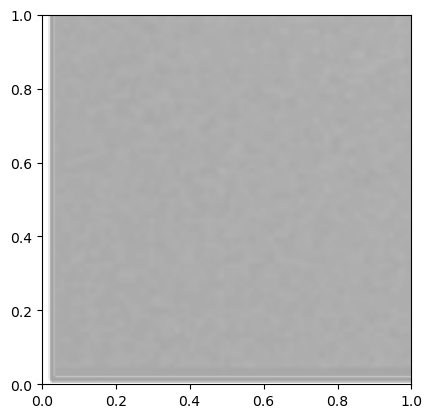

In [8]:
movement_analyzer.save_plots_for_all(excluding=excluding)

In [ ]:
lexie_test = loader.subjects["lexietest"]

# loader.subjects contains Subject object which named after the data folder(e.g. lexietest)
# Subject contains movement_sequence, rotation_sequence (and meta)
# both are dictionary with trial_number as key
# MovementData is the value for each item in movement_sequence, it contains trial_name, trial_number, trial_time (since that trial started), x, y,
# RotationData is the value for each item in rotation_sequence, it contains trial_name, trial_number, trial_time (how much time does that trial take), rotation

# Currently the movement analyzer can only handle normal (not alternative) trials, will add that later this week
movement_analyzer = MovementAnalyzer(loader)

# rotation analyzer gives the absolute angular error for each trial (both normal and alternative)
rotation_analyzer = RotationAnalyzer(loader)

# for n in range(3, 23):
#     err = rotation_analyzer.calculate_estimation_error("lexietest", n)
#     print(f"TrialNumber {n}, estimation error {err}")
#
# # Noted that though the trial number is always from 3-23, the starting location and target is different between pointing and wayfinding
# for n in range(3, 23):
#     X, Y = movement_analyzer.load_xy(lexie_test, trial_number=n)
#     movement_analyzer.draw(n, X, Y)

excluding = ["CY4GO", "PE12LE", "MA14BL_learn_point", "JU11SI", "sa13pe"]

# for n in range(3, 23):
#     err = rotation_analyzer.calculate_estimation_error("lexietest", n)
#     print(f"TrialNumber {n}, estimation error {err}")

errors = rotation_analyzer.calculate_all_estimation_error_for_all(3, 23, excluding=excluding)

print(errors["lexietest"][3]) # Print just one subject's error on trial 3
print(errors["lexietest"]) # Print just one subject's error on all trials


# Noted that though the trial number is always from 3-23, the starting location and target is different between pointing and wayfinding
# for n in range(3, 23):
#     X, Y = movement_analyzer.load_xy(lexie_test, trial_number=n)
#     movement_analyzer.draw(n, X, Y)
# print(movement_analyzer.calculate_efficiency_all("lexietest"))

efficiencies = movement_analyzer.calculate_efficiency_for_all(excluding=excluding)


print(efficiencies["lexietest"][3]) # Print just one subject's error on trial 3
print(efficiencies["lexietest"]) # Print just one subject's error on all trials

59.19999999999998
{3: 59.19999999999998, 4: 3.549999999999984, 5: 2.5999799999999205, 6: 85.60000000000005, 7: 46.05001000000002, 8: 2.7999999999999416, 9: 66.50000000000001, 10: 36.65000000000001, 11: 43.40000000000003, 12: 43.55000000000004, 13: 13.249999999999995, 14: 171.55000000000004, 15: 46.7, 16: 2.8999999999999417, 17: 61.00003000000002, 18: 75.65, 19: 13.399999999999912, 20: 71.34989999999999, 21: 51.15, 22: 20.000000000000032}
0.45454545454545453
{3: 0.45454545454545453, 4: 1.0, 5: 1.0, 6: 1, 7: 0.6, 8: 0.9166666666666666, 9: 0.8095238095238095, 10: 0.4444444444444444, 11: 0.058823529411764705, 12: 0.2727272727272727, 13: 0.3333333333333333, 14: 0.5161290322580645, 15: 1, 16: 0.7777777777777778, 17: 0.3333333333333333, 18: 0.56, 19: 0.45, 20: 0.3055555555555556, 21: 0.7777777777777778, 22: 0.7777777777777778}
